In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\srgurram\Downloads\ML_Projects\heart.csv")

In [3]:
data.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  
0                      170                        0  
1                      158                        0  
2                      162                        1  
3                      181                        0  
4                      145                        0

#### Patient_id is unique. So we can drop the column
* thal is categorical variable
* exercise_induced_angina is TARGET COLUMN


In [4]:
data = data.drop('patient_id',axis ='columns')

In [5]:
data.describe()

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            180.000000           180.000000   
mean                               0.161111             1.050000   
std                                0.368659             0.998742   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   180.000000                180.000000  180.000000   
mean                    249.211111                  1.010000    0.688889   
std                      52.717969                  1.121357    0.464239   
min                     126.000000                  0.000000    0.000000   
25%                     213.750000                  0.000000    0.000000   
50%                     245.500000                  0.800000    1.000000   
75%                     281.250000                  1.600000    1.000000   
max                     564.000000                  6.200000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  
count  180.000000               180.000000               180.000000  
mean    54.811111               149.483333                 0.316667  
std      9.334737                22.063513                 0.466474  
min     29.000000                96.000000                 0.000000  
25%     48.000000               132.000000                 0.000000  
50%     55.000000               152.000000                 0.000000  
75%     62.000000               166.250000                 1.000000  
max     77.000000               202.000000                 1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

# Checking NULL Values - No NULL Values

In [7]:
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [8]:
categorical=[]
continous=[]

for x in data.columns:
   if data[x].dtypes=='object':
     categorical.append(x)
   else:
      continous.append(x)

In [9]:
print(continous)

['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']


In [10]:
data['thal'].value_counts() #3 Unique Values in thal Column


normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

# Univariant Analysis

In [11]:
import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###
* slope_of_peak_exercise_st_segment has " 1" values as HIGH
* thal contains "normal" values as HIGH in the dataset & "fixed_defect has only 8 Values
* resting_blood_pressure contains the values between 120 to 140 as High and most frequent value is 130
* chest_pain_type contains the value "4" as HIGH
* num_major_vessels contains "0" Vessels ass HIGH
* fasting_blood_sugar_gt_120_mg_per_dl contains " 0" as HIGH
* resting_ekg_results contains the value "2" as HIGH(52%) & "0" as second high (47%)
* serum_cholesterol_mg_per_dl contains "204" as most frequent value 
* oldpeak_eq_st_depression has "0" values as HIGH
* sex has values 1 as HIGH
* age contains the values bewteen 54 as most frequent value
* max_heart_rate_achieved values between 160 to 170 are HIGH
* exercise_induced_angina contains 68% of "0" Values.

ValueError: could not convert string to float: 'normal'

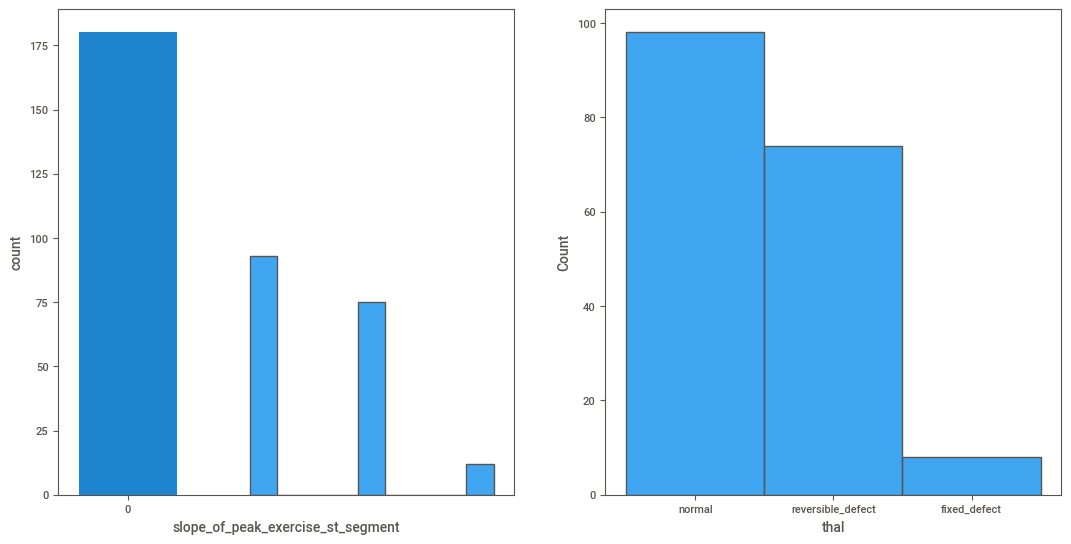

In [12]:
c=1
plt.pyplot.figure(figsize=(20,45))
for i in data.columns:
    plt.pyplot.subplot(6,3,c)
    sns.histplot(data[i])
    sns.countplot(data[i])
    c=c+1
plt.pyplot.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.pyplot.figure(figsize=(24,45), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in continous:               # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=13:                    # as there are 9 columns in the data
        ax = plt.pyplot.subplot(6,3,plotnumber)  # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.scatterplot(x=data[column],y=data.exercise_induced_angina) ## it give frequency hue =value counts
        plt.pyplot.xticks(rotation=90)    #assigning name to x-axis and "name" font size is 20
        plt.pyplot.tight_layout(pad=6.0) #assigning name to y-axis and "name" font size is 20
    plotnumber+=1                         # increment of plotnumber 
plt.pyplot.show()                                # to show graph

In [ ]:
for x in continous[::]:
  sns.boxplot(data[x])
  plt.pyplot.show()

###
*resting_blood-pressure has Ouliers
* chest_pain_type has Outliers
* oldpeak_eq_st_depression has Outliers


In [ ]:
data.skew()

* chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex has high Skewness

In [ ]:
data.serum_cholesterol_mg_per_dl = np.log(data.serum_cholesterol_mg_per_dl)
data.serum_cholesterol_mg_per_dl.skew()

In [ ]:
data.fasting_blood_sugar_gt_120_mg_per_dl = np.log(data.fasting_blood_sugar_gt_120_mg_per_dl)
data.fasting_blood_sugar_gt_120_mg_per_dl.skew()

In [ ]:
data.exercise_induced_angina.value_counts()

In [13]:
data = pd.get_dummies(data)
data

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0                                    1                     128   
1                                    2                     110   
2                                    1                     125   
3                                    1                     152   
4                                    3                     178   
..                                 ...                     ...   
175                                  2                     125   
176                                  2                     180   
177                                  2                     125   
178                                  1                     124   
179                                  1                     160   

     chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                  2                  0                                     0   
1                  3                  0                                     0   
2                  4                  3                                     0   
3                  4                  0                                     0   
4                  1                  0                                     0   
..               ...                ...                                   ...   
175                4                  2                                     1   
176                4                  0                                     0   
177                3                  0                                     0   
178                3                  2                                     1   
179                3                  1                                     0   

     resting_ekg_results  serum_cholesterol_mg_per_dl  \
0                      2                          308   
1                      0                          214   
2                      2                          304   
3                      0                          223   
4                      2                          270   
..                   ...                          ...   
175                    0                          254   
176                    1                          327   
177                    0                          309   
178                    0                          255   
179                    0                          201   

     oldpeak_eq_st_depression  sex  age  max_heart_rate_achieved  \
0                         0.0    1   45                      170   
1                         1.6    0   54                      158   
2                         0.0    1   77                      162   
3                         0.0    1   40                      181   
4                         4.2    1   59                      145   
..                        ...  ...  ...                      ...   
175                       0.2    1   67                      163   
176                       3.4    0   55                      117   
177                       1.8    1   64                      131   
178                       0.0    1   48                      175   
179                       0.0    0   54                      163   

     exercise_induced_angina  thal_fixed_defect  thal_normal  \
0                          0                  0            1   
1                          0                  0            1   
2                          1                  0            1   
3                          0                  0            0   
4                          0                  0            0   
..                       ...                ...          ...   
175                        0                  0            0   
176                        1                  0            1   
177                        1                  0            0   
178                        0                  0            1   
179                        0     

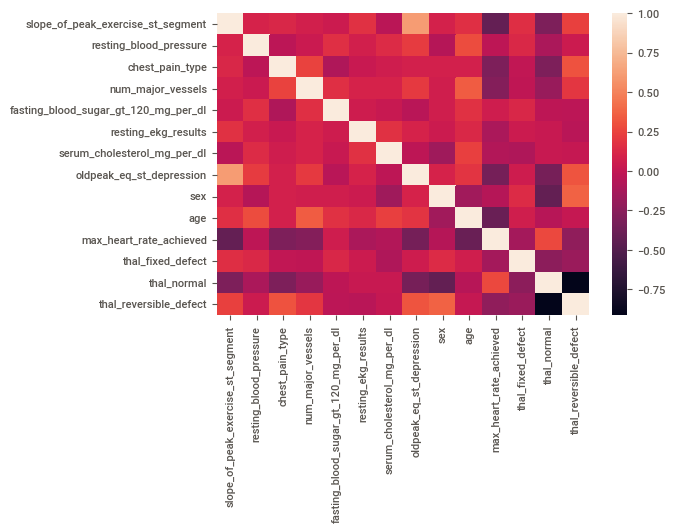

In [14]:
sns.heatmap(data.drop('exercise_induced_angina',axis=1).corr())

In [15]:
X = data.drop(columns = ['exercise_induced_angina']) ## independent variable
y = data['exercise_induced_angina']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25,random_state = 355)#splitting data into train and test

In [19]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
 ## base model with default parameters (default kernel: rbf)


# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#SVM
model3 = SVC()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
# predict probabilities
pred_train1 = model1.predict(x_train)
pred_train2 = model2.predict(x_train)
pred_train3 = model3.predict(x_train)
pred_test1 = model1.predict(x_test)
pred_test2 = model2.predict(x_test)
pred_test3 = model3.predict(x_test)


C:\Users\srgurram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(model1.score(x_test, pred_test1))
print(model2.score(x_test, pred_test2))
print(model3.score(x_test, pred_test3))

ValueError: Found input variables with inconsistent numbers of samples: [62, 45]

In [25]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [26]:
accuracy = accuracy_score(y_train,pred_train1)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(y_train,pred_train2)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(y_train,pred_train3)# model traning accuracy  
print(accuracy)

0.8222222222222222
0.7555555555555555
0.6888888888888889


In [27]:
accuracy = accuracy_score(y_test,pred_test1)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(y_test,pred_test2)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(y_test,pred_test3)# model traning accuracy  
print(accuracy)

0.7777777777777778
0.5777777777777777
0.6666666666666666


In [28]:
print(confusion_matrix(y_test, pred_test1))
print(confusion_matrix(y_test, pred_test2))
print(confusion_matrix(y_test, pred_test3))

[[26  4]
 [ 6  9]]
[[25  5]
 [14  1]]
[[30  0]
 [15  0]]


In [29]:
report=classification_report(y_test, pred_test1)# it will give precision,recall,f1 scores and accuracy  
print(report)
report=classification_report(y_test, pred_test2)# it will give precision,recall,f1 scores and accuracy  
print(report)
report=classification_report(y_test, pred_test3)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.69      0.60      0.64        15

    accuracy                           0.78        45
   macro avg       0.75      0.73      0.74        45
weighted avg       0.77      0.78      0.77        45

              precision    recall  f1-score   support

           0       0.64      0.83      0.72        30
           1       0.17      0.07      0.10        15

    accuracy                           0.58        45
   macro avg       0.40      0.45      0.41        45
weighted avg       0.48      0.58      0.51        45

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        30
           1       0.00      0.00      0.00        15

    accuracy                           0.67        45
   macro avg       0.33      0.50      0.40        45
weighted avg       0.44      0.67      0.53        45



C:\Users\srgurram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_test1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_test2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_test3, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [31]:
roc_auc = auc(fpr1, tpr1)
print(roc_auc)
roc_auc = auc(fpr2, tpr2)
print(roc_auc)
roc_auc = auc(fpr3, tpr3)
print(roc_auc)

0.7333333333333334
0.45
0.5


In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [33]:
X_smote, y_smote = smote.fit_resample(X,y)

In [34]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 123, 1: 57})
SMOTE Classes Counter({0: 123, 1: 123})


In [35]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_smote, y_smote,random_state=3)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
 ## base model with default parameters (default kernel: rbf)


# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#SVM
model3 = SVC()

# fit model
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
# predict probabilities
pred_train1 = model1.predict(X_train)
pred_train2 = model2.predict(X_train)
pred_train3 = model3.predict(X_train)
pred_test1 = model1.predict(X_test)
pred_test2 = model2.predict(X_test)
pred_test3 = model3.predict(X_test)


C:\Users\srgurram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
accuracy = accuracy_score(Y_train,pred_train1)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(Y_train,pred_train2)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(Y_train,pred_train3)# model traning accuracy  
print(accuracy)

0.8097826086956522
0.7717391304347826
0.6467391304347826


In [38]:
accuracy = accuracy_score(Y_test,pred_test1)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(Y_test,pred_test2)# model traning accuracy  
print(accuracy)
accuracy = accuracy_score(Y_test,pred_test3)# model traning accuracy  
print(accuracy)

0.7096774193548387
0.6774193548387096
0.7580645161290323


In [39]:
report=classification_report(Y_test, pred_test1)# it will give precision,recall,f1 scores and accuracy  
print(report)
report=classification_report(Y_test, pred_test2)# it will give precision,recall,f1 scores and accuracy  
print(report)
report=classification_report(Y_test, pred_test3)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.85      0.76        33

    accuracy                           0.71        62
   macro avg       0.72      0.70      0.70        62
weighted avg       0.72      0.71      0.70        62

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        29
           1       0.69      0.73      0.71        33

    accuracy                           0.68        62
   macro avg       0.68      0.67      0.67        62
weighted avg       0.68      0.68      0.68        62

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.75      0.82      0.78        33

    accuracy                           0.76        62
   macro avg       0.76      0.75      0.75        62
weighted avg       0.76      0.76      0.76        62



In [40]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_test1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_test2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_test3, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)


In [41]:
roc_auc = auc(fpr1, tpr1)
print(roc_auc)
roc_auc = auc(fpr2, tpr2)
print(roc_auc)
roc_auc = auc(fpr3, tpr3)
print(roc_auc)


0.7001044932079415
0.6739811912225706
0.7539184952978057


In [51]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.78333333 0.85       0.78333333]
Avg : 0.8055555555555555


In [43]:
score_svm =cross_val_score(SVC(gamma='auto'), X, y,cv=3)
print(score_svm)
print("Avg :",np.average(score_svm))

[0.68333333 0.68333333 0.68333333]
Avg : 0.6833333333333332


In [44]:
score_KNN = cross_val_score(KNeighborsClassifier(n_neighbors=4),X,y,cv=3)
print(score_KNN)
print("Avg :",np.average(score_KNN))

[0.68333333 0.58333333 0.61666667]
Avg : 0.6277777777777778


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)


0.7333333333333333

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)


0.8064516129032258

In [53]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.8        0.76666667 0.73333333]
Avg : 0.7666666666666667


In [54]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=30),X,y,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.75       0.76666667 0.73333333]
Avg : 0.75


In [55]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=50),X,y,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.76666667 0.75       0.81666667]
Avg : 0.7777777777777777


In [58]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=60),X,y,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.76666667 0.8        0.78333333]
Avg : 0.7833333333333333


In [61]:
from sklearn.ensemble import BaggingClassifier
bag_dt= BaggingClassifier(rf)
bag_dt.fit(x_train, y_train)
print(bag_dt.score(x_train,y_train))
print(bag_dt.score(x_test,y_test))

0.9555555555555556
0.7777777777777778


In [64]:
from sklearn.ensemble import BaggingClassifier
bag_dt= BaggingClassifier(rf)
bag_dt.fit(X_train, Y_train)
print(bag_dt.score(X_train,Y_train))
print(bag_dt.score(X_test,Y_test))

0.9891304347826086
0.7419354838709677


In [63]:
from sklearn.ensemble import AdaBoostClassifier
boost1= AdaBoostClassifier(rf)
boost1.fit(x_train, y_train)
print(boost1.score(x_train,y_train))
print(boost1.score(x_test,y_test))

1.0
0.7555555555555555
